# 4.10 TASK
This Notebook contains:
1. Import libraries and data
2. Data security: personal personally identifiable information (PII)
3. Customer behaviour analysis
4. Customer profiling

## 01. Import libraries and data

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Connect cloud to my Google Drive

from google.colab import drive
drive.mount('/content/gdrive')
!ls # access the gdrive locally

Mounted at /content/gdrive
gdrive	sample_data


In [3]:
# Set file path

path = "/content/gdrive/MyDrive/Colab Notebooks"

In [4]:
# Import the latest merged data set

df= pd.read_pickle(os.path.join(path,'final_merge.pkl'))

In [5]:
# Quick check of the imported data set (head, column names, shape)

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
print(df.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_dslo', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income'],
      dtype='object')


In [7]:
print(df.shape)

(32404859, 31)


## 02. Data security: personally identifiable information (PII)
The dataframe includes sensitive data that needs to be addressed, full names can be used to trace back the individual so we better scrub the columns before carrying on with the analysis.

In [8]:
# Remove columns containging PII

df = df.drop(columns = ['first_name', 'last_name'])

In [9]:
# Check output

print(df.shape) # Two variables removed so there should be 29 columns now

(32404859, 29)


## 03. Customer behaviour analysis

### 03.1 Compare customer behavior in different geographic areas.
Create a “region” column based on the “state” column from your customers data set and cross check it with the “spending_flag” column.

In [10]:
# Define the geographical regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Create new 'region' column based on the 'state' column

df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [12]:
# Check output

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Check whether there’s a difference in spending habits between the different U.S. regions

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [14]:
# Check output

crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### INSIGHT: The lowest spenders are located in the South, however the highest spenders are also located in the same region. All regions registered more low spenders than high spenders. Table will be included in the report.

### 03.2 Create a flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [15]:
# Set flag parametres, use the derived 'max_order' column (represents the max number of orders per user)

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low activity'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high activity'

In [16]:
# Print the frequency of the new 'customer_activity' column

df['customer_activity'].value_counts(dropna = False)

high activity    30964564
low activity      1440295
Name: customer_activity, dtype: int64

In [17]:
# Create subset for low-activity customers

low_activity_users = df[df['customer_activity'] == 'low activity']

In [18]:
# Check subset output (head, column names, shape)

low_activity_users.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,customer_activity
1510,520620,120,1,3,11,0,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1511,3273029,120,3,2,8,19,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1512,520620,120,1,3,11,0,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1513,3273029,120,3,2,8,19,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity
1514,520620,120,1,3,11,0,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low activity


In [19]:
print(low_activity_users.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_dslo', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region', 'customer_activity'],
      dtype='object')


In [20]:
print(low_activity_users.shape) #  number of rows matches with frequency number of low activity flag, number of columns matches with df columns + newly craeted region & customer_activity

(1440295, 31)


In [21]:
# Export the subset as pickle file on my GDRIVE

low_activity_users.to_pickle(os.path.join(path, 'low_customer_activity.pkl'))

In [22]:
# Create subset for high-activity customers (the rest)

high_activity_users = df[df['customer_activity'] == 'high activity']

In [23]:
# Check if shape has same number of rows as in 'customer_activity' frequency table & 31 columns

print(high_activity_users.shape) # yes, they match. This will be our new dataframe

(30964564, 31)


## 04. Customer profiling

### 04.1 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [24]:
# Import department data set

df_dep = pd.read_csv(os.path.join(path,'departments_wrangled.csv'))

In [25]:
# Check the imported dataframe (head, columns, shape)

df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [26]:
print (df_dep.shape)

(21, 2)


In [27]:
# Rename 'Unnamed: 0' to 'department_id'

df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [28]:
# Check output

print (df_dep.columns)

Index(['department_id', 'department'], dtype='object')


In [29]:
# Merge the two data sets

df_merged = high_activity_users.merge(df_dep, on = 'department_id')

In [30]:
# Check if shape adds up

print (df_merged.shape) # yes, there is one more column for department name

(30964564, 32)


In [31]:
# Identify best sold goods

df_merged['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [32]:
df_merged['product_name'].value_counts(dropna = False)

Banana                           453164
Bag of Organic Bananas           366403
Organic Strawberries             255988
Organic Baby Spinach             231772
Organic Hass Avocado             206799
                                  ...  
Escapes Variety Pack                  1
Blackened Turkey                      1
High Protein Chocolate Liquid         1
All Purpose Seasoning                 1
Cinnamon Rice Pudding Snacks          1
Name: product_name, Length: 49630, dtype: int64

#### As the marketing team at Instacart wants to create more-relevant marketing strategies for different products, we should focus on the best sold goods which are fruit & veg within produce department.

In [33]:
# Group ages in categories (min age is 18 - max is 81)

df_merged.loc[df_merged['age'] <= 30, 'age_group'] = 'Young Adult'
df_merged.loc[(df_merged['age'] > 31) & (df_merged['age'] < 40), 'age_group'] = 'Adult'
df_merged.loc[(df_merged['age'] > 41) & (df_merged['age'] < 59), 'age_group'] = 'Middle aged'
df_merged.loc[df_merged['age'] > 60, 'age_group'] = 'Senior'

In [34]:
# Check 'age_group' column frequency

df_merged['age_group'].value_counts (dropna = False)

Senior         10112607
Middle aged     8309643
Young Adult     6304240
Adult           3854652
NaN             2383422
Name: age_group, dtype: int64

#### INSIGHT: Most of the customers are seniors, which makes sense as we previously determined that the highest income is earned by customers over 40 yrs old, so they have the highest spending power. There are 2383422 missing values unfortunately, so those customers cannot be age grouped.  

In [35]:
# Group income into high, low and regular income

df_merged['income'].agg(['min','max','mean'])

min      25903.000000
max     593901.000000
mean     99675.865108
Name: income, dtype: float64

In [36]:
# Set subsets parameters

df_merged.loc[df_merged['income'] < 50000, 'income_range'] = 'Lower income'
df_merged.loc[(df_merged['income'] >= 50000) & (df_merged['income'] <= 150000), 'income_range'] = 'Middle income'
df_merged.loc[df_merged['income'] > 150000, 'income_range'] = 'Upper income'

In [37]:
# Check 'income_range' column frequency

df_merged['income_range'].value_counts (dropna = False)

Middle income    23707476
Upper income      3894534
Lower income      3362554
Name: income_range, dtype: int64

#### INSIGHT: Average earners are the highest spenders.

In [38]:
# Grouping based on number of dependents (0-3)

df_merged.loc[(df_merged['number_of_dependents'] ==0), 'family_status'] = 'Single adult'

df_merged.loc[(df_merged['number_of_dependents'] >= 1) & (df_merged['number_of_dependents'] <= 2), 'family_status'] = 'Family'

df_merged.loc[(df_merged['number_of_dependents'] >= 3), 'family_status'] = 'Big Family'


In [39]:
# Check new column frequency

df_merged['family_status'].value_counts (dropna = False)

Family          15452367
Big Family       7772516
Single adult     7739681
Name: family_status, dtype: int64

#### INSIGHT: Based of the customer data that we have, our clientele is mostly made of families of 2-3 (including the customer and their dependents).

In [40]:
# Create customer profiles based on age, income, number of dependents and certain goods.

df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Senior_Mid_Family'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Senior_Mid_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Senior_Mid_Single'

In [41]:
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Senior_Upp_Family'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Senior_Upp_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Senior_Upp_Single'

In [42]:
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Senior_Low_Family'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Senior_Low_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Senior'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Senior_Low_Single'

In [43]:
# Create customer profiles based on age, income, number of dependents and certain goods.

df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Aged_Mid_Family'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Aged_Mid_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Aged_Mid_Single'

In [44]:
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Aged_Upp_Family'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Senior_Upp_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Senior_Upp_Single'

In [45]:
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Aged_Low_Family'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Aged_Low_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Middle aged'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Aged_Low_Single'

In [46]:
# Create customer profiles based on age, income, number of dependents and certain goods.

df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'YA_Mid_Family'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'YA_Mid_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'YA_Mid_Single'

In [47]:
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'YA_Upp_Family'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'YA_Upp_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'YA_Upp_Single'

In [48]:
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'YA_Low_Family'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'YA_Low_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Young Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'YA_Low_Single'

In [49]:
# Create customer profiles based on age, income, number of dependents and certain goods.

df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Adult_Mid_Family'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Adult_Mid_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Middle income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Adult_Mid_Single'

In [50]:
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Adult_Upp_Family'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Adult_Upp_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Upper income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Adult_Upp_Single'

In [51]:
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Family'])), 'customer_profile'] = 'Adult_Low_Family'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Big family'])), 'customer_profile'] = 'Adult_Low_BigFamily'
df_merged.loc[(df_merged['income_range'].isin(['Lower income'])) & (df_merged['age_group'].isin (['Adult'])) & (df_merged['family_status'].isin (['Single adult'])), 'customer_profile'] = 'Adult_Low_Single'

In [52]:
# Check frequency table for 'customer_profile'

df_merged['customer_profile'].value_counts (dropna = False)

NaN                  9549604
Senior_Mid_Family    3680498
Aged_Mid_Family      3017255
YA_Mid_Family        2621479
Senior_Mid_Single    1837936
Adult_Mid_Family     1630881
Aged_Mid_Single      1488172
YA_Mid_Single        1302521
Senior_Upp_Family     954584
Senior_Upp_Single     899898
Adult_Mid_Single      800972
Aged_Upp_Family       789745
YA_Low_Family         488302
Senior_Low_Family     419213
Aged_Low_Family       343053
Adult_Low_Family      290859
YA_Low_Single         258410
Senior_Low_Single     203163
Aged_Low_Single       169052
Adult_Low_Single      146351
YA_Upp_Family          29936
Adult_Upp_Family       20587
YA_Upp_Single          12441
Adult_Upp_Single        9652
Name: customer_profile, dtype: int64

### 04.2 Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'Distribution of Customer Profiles')

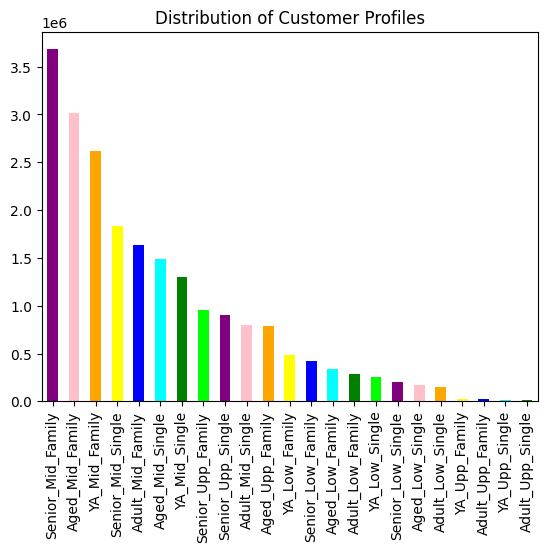

In [53]:
# Create a bar chart to visualise the customer profiles based on spending, age, number of dependents, marital status, and certain products categories

bar = df_merged['customer_profile'].value_counts().plot.bar(color = ['purple','pink', 'orange','yellow', 'blue','cyan','green','lime' ])
plt.title('Distribution of Customer Profiles')

#### INSIGHT: Top customer profile is middle-class senior with 1-2 dependents. Followed by middle agend and young adult with same income & dependents range.

In [54]:
# Save bar chart as image

bar.figure.savefig(os.path.join(path, 'bar_cust_profiles.png'))

### 04.3 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [65]:
# Aggregate min. max. and mean on income for frequency and expenditure.

customer_profile_agg = df_merged.groupby(['income_range','age_group','family_status',])[['days_since_last_order','prices']].agg(['min','max','mean'])

In [66]:
# Check output

customer_profile_agg

days_since_last_order                 \
                                                          min max       mean   
income_range  age_group   family_status                                        
Lower income  Adult       Big Family                        0  30  10.608047   
                          Family                            0  30  10.635280   
                          Single adult                      0  30  10.494592   
              Middle aged Big Family                        0  30  10.717642   
                          Family                            0  30  10.510857   
                          Single adult                      0  30  10.305959   
              Senior      Big Family                        0  30  10.561115   
                          Family                            0  30  10.415696   
                          Single adult                      0  30  10.491940   
              Young Adult Big Family                        0  30  10.767070   
                          Family                            0  30  10.518351   
                          Single adult                      0  30  10.551616   
Middle income Adult       Big Family                        0  30  10.156640   
                          Family                            0  30  10.059249   
                          Single adult                      0  30  10.293766   
              Middle aged Big Family                        0  30  10.319341   
                          Family                            0  30  10.221470   
                          Single adult                      0  30  10.192280   
              Senior      Big Family                        0  30  10.233491   
                          Family                            0  30  10.214098   
                          Single adult                      0  30  10.131335   
              Young Adult Big Family                        0  30  10.019735   
                          Family                            0  30  10.239041   
                          Single adult                      0  30  10.309905   
Upper income  Adult       Big Family                        0  30   9.372549   
                          Family                            0  30  11.036771   
                          Single adult                      0  30   9.388935   
              Middle aged Big Family                        0  30  10.127258   
                          Family                            0  30  10.177455   
                          Single adult                      0  30   9.953905   
              Senior      Big Family                        0  30  10.256855   
                          Family                            0  30  10.082360   
                          Single adult                      0  30  10.171355   
              Young Adult Big Family                        0  30  10.375015   
                          Family                            0  30   9.176343   
                          Single adult                      0  30  10.577767   

                                        prices                 
                                           min  max      mean  
income_range  age_group   family_status                        
Lower income  Adult       Big Family       0.0  1.0  0.627390  
                          Family           0.0  1.0  0.619383  
                          Single adult     0.0  1.0  0.623487  
              Middle aged Big Family       0.0  1.0  0.631486  
                          Family           0.0  1.0  0.639461  
                          Single adult     0.0  1.0  0.642980  
              Senior      Big Family       0.0  1.0  0.635419  
                          Family           0.0  1.0  0.636600  
                          Single adult     0.0  1.0  0.635490  
              Young Adult Big Family       0.0  1.0  0.617063  
                          Family           0.0  1.0  0.624253  
                       

#### INSIGHT: The mean, min and max on the 3 variables are very similar to each other from category to category.

### 04.4 Compare your customer profiles with regions and departments. Customers may demonstrate different behaviors across regions, see if you can identify a link between them.

In [67]:
# Compare 'customer_profile' & 'region'

test = df_merged.groupby('region')[['customer_profile']].value_counts().reset_index(name='count')

In [68]:
# Check output

test

,region,customer_profile,count
0,Midwest,Senior_Mid_Family,859364
1,Midwest,Aged_Mid_Family,725991
2,Midwest,YA_Mid_Family,606637
3,Midwest,Senior_Mid_Single,438890
4,Midwest,Adult_Mid_Family,375936
...,...,...,...
87,West,Adult_Low_Single,35351
88,West,YA_Upp_Family,8599
89,West,Adult_Upp_Family,5489
90,West,YA_Upp_Single,1876


In [69]:
# Compare 'department' & 'region'

test1 = df_merged.groupby('region')[['department']].value_counts().reset_index(name='count')

In [70]:
# Check output

test1

,region,department,count
0,Midwest,produce,2134115
1,Midwest,dairy eggs,1212490
2,Midwest,snacks,645143
3,Midwest,beverages,598979
4,Midwest,frozen,498225
...,...,...,...
79,West,alcohol,36754
80,West,pets,24059
81,West,missing,15906
82,West,bulk,8743


In [82]:
# Compare 'department' & 'customer_profile'

test2 = df_merged.groupby('customer_profile')[['department']].value_counts().reset_index(name='count')

In [83]:
# Check output

test2

,customer_profile,department,count
0,Adult_Low_Family,produce,72350
1,Adult_Low_Family,snacks,45618
2,Adult_Low_Family,dairy eggs,43449
3,Adult_Low_Family,beverages,30783
4,Adult_Low_Family,frozen,19233
...,...,...,...
477,YA_Upp_Single,babies,63
478,YA_Upp_Single,pets,48
479,YA_Upp_Single,missing,30
480,YA_Upp_Single,other,17


### 04.5 Produce suitable charts to illustrate your results and export them in your project folder.

Text(0.5, 1.0, 'Customer Profile Distribution by US Region')

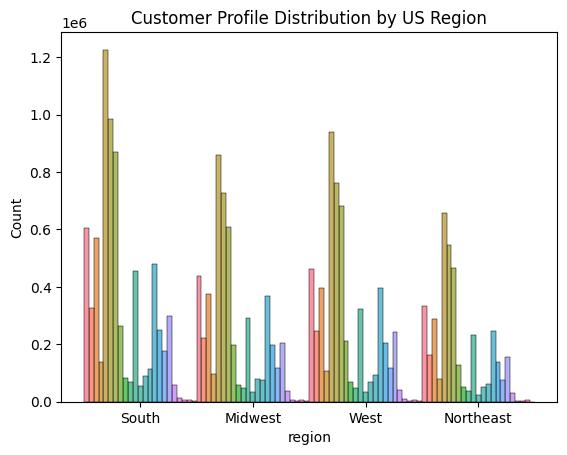

In [81]:
# Visualise 'test' as a histogram

histogram_test = sns.histplot(x = 'region', hue = 'customer_profile', data= df_merged, multiple = "dodge", legend=None)

plt.ylabel('Count')
plt.title('Customer Profile Distribution by US Region')

In [88]:
# Export the histogram as image and save on my GDRIVE

histogram_test.figure.savefig(os.path.join(path, 'hist_profiles_region.png'))